In [1]:
import pickle

Model structure:
{'W1': array([[ 0.02567379, -0.02345242, -0.04226237, ..., -0.02243365,
        -0.06159909,  0.02446069],
       [-0.02810556, -0.00882493, -0.00983572, ...,  0.05233728,
        -0.01501543,  0.02392469],
       [-0.0140264 , -0.01526103, -0.00658373, ..., -0.02688936,
         0.0116675 , -0.01202081],
       ...,
       [-0.07041964, -0.01825033,  0.0180607 , ..., -0.01472693,
        -0.00650756, -0.0092696 ],
       [-0.05386305,  0.00928774,  0.02359869, ...,  0.00403651,
        -0.01730447, -0.00818522],
       [ 0.01255329,  0.03126637, -0.00749741, ...,  0.04327068,
        -0.0368637 , -0.02539641]]), 'b1': array([[ 3.82040384e-02,  2.51451964e-03,  2.46622980e-02,
        -4.45055070e-02, -5.79777994e-02, -2.07678645e-02,
         1.49941831e-02, -1.33420401e-02,  8.58083108e-03,
        -1.50937248e-02, -2.88268096e-02, -9.90947471e-03,
        -2.44341334e-02, -2.92930496e-02,  9.03528141e-03,
        -5.04604034e-02, -1.47920590e-02,  4.53638415e-02,
  

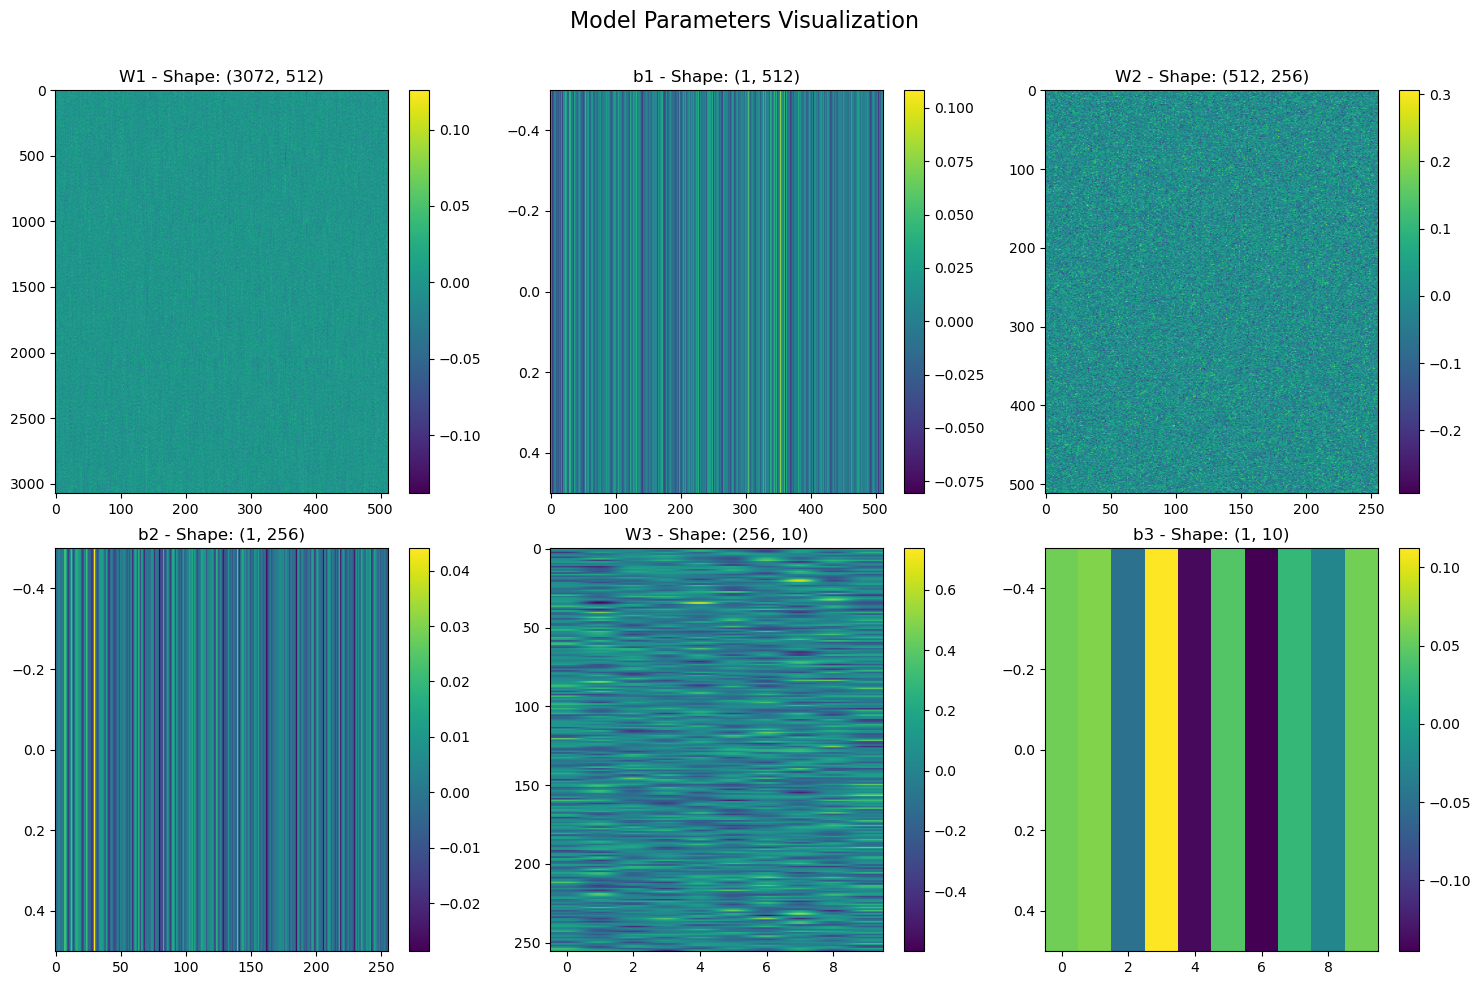

In [2]:
import numpy as np
import os

import matplotlib.pyplot as plt

# Load the model from pickle file
with open('best_model_512_256_0.01_1e-05_tanh.pkl', 'rb') as file:
  model = pickle.load(file)

# Print model structure
print("Model structure:")
print(model)

# Assuming the model has a state_dict or parameters attribute
# This code works for PyTorch models, adjust if using a different framework
if hasattr(model, 'state_dict'):
  params = model.state_dict()
elif hasattr(model, 'get_weights'):
  params = model.get_weights()  # For Keras/TensorFlow models
else:
  params = model  # Assume the pickle directly contains parameters

# Visualize parameters
plt.figure(figsize=(15, 10))

# Counter for subplot positions
plot_count = 1
max_plots = min(8, len(params)) if isinstance(params, dict) else 4

for name, param in (params.items() if isinstance(params, dict) else []):
  if plot_count > max_plots:
    break
    
  plt.subplot(2, max_plots//2, plot_count)
  
  # For weight matrices
  if len(param.shape) == 2:
    plt.imshow(param.detach().numpy() if hasattr(param, 'detach') else param, 
           cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title(f'{name} - Shape: {param.shape}')
  
  # For vectors
  elif len(param.shape) == 1:
    plt.hist(param.detach().numpy() if hasattr(param, 'detach') else param, bins=50)
    plt.title(f'{name} - Distribution')
  
  plot_count += 1

plt.tight_layout()
plt.suptitle('Model Parameters Visualization', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()